In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [0]:
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.2/spark-2.4.2-bin-hadoop2.7.tgz

In [0]:
!tar xf spark-2.4.2-bin-hadoop2.7.tgz

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.2-bin-hadoop2.7"

In [7]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [0]:
from pyspark.sql import SparkSession, SQLContext, Row
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark import SparkContext

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



from IPython.display import display
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [0]:
df = spark.read.csv('max.csv',header=True,inferSchema=True)

In [11]:
selectColumns = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR','season']
df = df.select(selectColumns)

AnalysisException: ignored

In [0]:
df = df.withColumn('Date',to_date(from_unixtime(unix_timestamp('Date','dd/MM/yy'))))
df.toPandas().head()

In [0]:
df.toPandas().tail()

In [0]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- HomeTeam: string (nullable = true)
 |-- AwayTeam: string (nullable = true)
 |-- FTHG: integer (nullable = true)
 |-- FTAG: integer (nullable = true)
 |-- FTR: string (nullable = true)
 |-- HS: integer (nullable = true)
 |-- AS: integer (nullable = true)
 |-- HST: integer (nullable = true)
 |-- AST: integer (nullable = true)
 |-- HC: integer (nullable = true)
 |-- AC: integer (nullable = true)
 |-- HF: integer (nullable = true)
 |-- AF: integer (nullable = true)
 |-- HY: integer (nullable = true)
 |-- AY: integer (nullable = true)
 |-- HR: integer (nullable = true)
 |-- AR: integer (nullable = true)
 |-- season: integer (nullable = true)



In [0]:
df.count()

7220

In [0]:
df.toPandas().isnull().sum()

Date         0
HomeTeam     0
AwayTeam     0
FTHG        20
FTAG        20
FTR         20
HS          20
AS          20
HST         20
AST         20
HC          20
AC          20
HF          20
AF          20
HY          20
AY          20
HR          20
AR          20
season       0
dtype: int64

## Correlation 

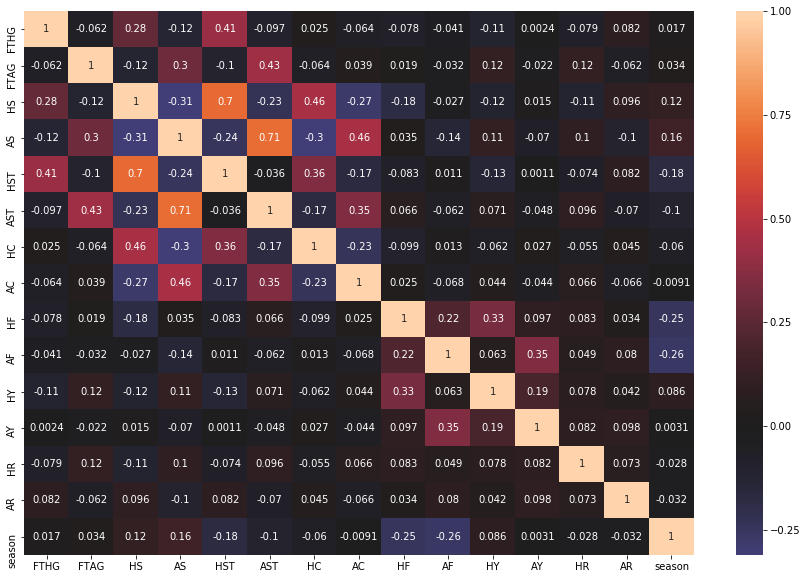

In [0]:
corr = df.toPandas().corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax ,annot=True ,center=0)
plt.show()

## Explore Data

In [0]:
homeTeam = df.groupby('season').agg(countDistinct('HomeTeam')).sort(col('season').asc())

In [0]:
homeTeam.show()

+------+------------------------+
|season|count(DISTINCT HomeTeam)|
+------+------------------------+
|  2000|                      20|
|  2001|                      20|
|  2002|                      20|
|  2003|                      20|
|  2004|                      20|
|  2005|                      20|
|  2006|                      20|
|  2007|                      20|
|  2008|                      20|
|  2009|                      20|
|  2010|                      20|
|  2011|                      20|
|  2012|                      20|
|  2013|                      20|
|  2014|                      20|
|  2015|                      20|
|  2016|                      20|
|  2017|                      20|
|  2018|                      20|
+------+------------------------+



In [0]:
count = df.select('HomeTeam').distinct().count()
print(count ,df.select('HomeTeam').distinct().show(count))

+----------------+
|        HomeTeam|
+----------------+
|       Tottenham|
|        Brighton|
|          Bolton|
|      Sunderland|
|        Bradford|
|            Hull|
|        Coventry|
|         Arsenal|
|        Man City|
|       Blackburn|
|         Cardiff|
|Sheffield United|
|         Norwich|
|  Crystal Palace|
|      Birmingham|
|         Burnley|
|           Derby|
|       Leicester|
|     Aston Villa|
|             QPR|
|     Bournemouth|
|          Fulham|
|        West Ham|
|      Man United|
|           Stoke|
|          Wolves|
|     Southampton|
|       West Brom|
|         Reading|
|         Swansea|
|    Huddersfield|
|         Ipswich|
|       Liverpool|
|     Middlesboro|
|      Portsmouth|
|         Chelsea|
|        Charlton|
|       Newcastle|
|         Watford|
|         Everton|
|           Leeds|
|       Blackpool|
|           Wigan|
|   Middlesbrough|
+----------------+

44 None


In [0]:
df.filter(col('season')==2018).groupby('HomeTeam').count().show()

+--------------+-----+
|      HomeTeam|count|
+--------------+-----+
|     Tottenham|   19|
|      Brighton|   19|
|       Arsenal|   19|
|      Man City|   19|
|       Cardiff|   19|
|Crystal Palace|   19|
|       Burnley|   19|
|     Leicester|   19|
|   Bournemouth|   19|
|        Fulham|   19|
|      West Ham|   19|
|    Man United|   19|
|        Wolves|   19|
|   Southampton|   19|
|  Huddersfield|   19|
|     Liverpool|   19|
|       Chelsea|   19|
|     Newcastle|   19|
|       Watford|   19|
|       Everton|   19|
+--------------+-----+



### ผลเตะที่มากที่สุดของแต่ละทีมในฐานะเจ้าบ้าน ของทุก season

In [0]:
df.groupby('season').pivot('HomeTeam').agg(max('FTHG')).sort(col('season').asc()).na.fill(0).show()

+------+-------+-----------+----------+---------+---------+------+-----------+--------+--------+-------+-------+--------+-------+--------+--------------+-----+-------+------+------------+----+-------+-----+---------+---------+--------+----------+-----------+-------------+---------+-------+----------+---+-------+----------------+-----------+-----+----------+-------+---------+-------+---------+--------+-----+------+
|season|Arsenal|Aston Villa|Birmingham|Blackburn|Blackpool|Bolton|Bournemouth|Bradford|Brighton|Burnley|Cardiff|Charlton|Chelsea|Coventry|Crystal Palace|Derby|Everton|Fulham|Huddersfield|Hull|Ipswich|Leeds|Leicester|Liverpool|Man City|Man United|Middlesboro|Middlesbrough|Newcastle|Norwich|Portsmouth|QPR|Reading|Sheffield United|Southampton|Stoke|Sunderland|Swansea|Tottenham|Watford|West Brom|West Ham|Wigan|Wolves|
+------+-------+-----------+----------+---------+---------+------+-----------+--------+--------+-------+-------+--------+-------+--------+--------------+-----+-----

# Get aggregated score

In [0]:
selectData = []
for year in range(2000, 2019):
    selectData.append(df.select('Date','HomeTeam','AwayTeam','FTHG','FTAG').filter(col('season') == str(year) ))

In [0]:
# HTGS - Home Team Goal Scored
# ATGS = Away Team Goal Scored

# Create DataFrame for aggregated goals scored by each teams till each matchweeks

def get_agg_goals_scored(dataFrame):
  
  # Create  a dictonary with team names as keys
  teams = {}
  for i in dataFrame.groupby('HomeTeam').pivot('HomeTeam').mean().columns: #Pivot all teams to column
    if(i != 'HomeTeam'):#Remove HomeTeam Column
      i = i.replace('_avg(CAST(FTHG AS BIGINT))','').replace('_avg(CAST(FTAG AS BIGINT))','')#Delete garbage string
      if(list(teams.keys()).count(i) == 0):
        teams[i] = []
  #print(teams)
  
  # Aggregated goals scored each matchweek by each team (as either Home Team or Away Team)
  for row in dataFrame.rdd.collect(): #Don't know how to deal with 'NaN' or 'None'
    
      if len(teams[row.HomeTeam]) != 0:
        oldFTHG = teams[row.HomeTeam][len(teams[row.HomeTeam]) - 1]
        if row.FTHG is None:
          newFTHG = None
        else:
          newFTHG = oldFTHG + row.FTHG    
        teams[row.HomeTeam].append(newFTHG)
      else:
        teams[row.HomeTeam].append(row.FTHG)      
      if len(teams[row.AwayTeam]) != 0:
        oldFTAG = teams[row.AwayTeam][len(teams[row.AwayTeam]) - 1]
        if row.FTAG is None:
          newFTAG = None
        else:
          newFTAG = oldFTAG + row.FTAG
        teams[row.AwayTeam].append(newFTAG)
      else:
        teams[row.AwayTeam].append(row.FTAG)
        
  #Transform to DataFrame
  goals_scored = pd.DataFrame(data=teams, index=[i for i in range(1,(dataFrame.count() // 10) + 1)]).T
  goals_scored[0] = 0

  goalIndex = pd.DataFrame(goals_scored.index.values)
  goalIndex = spark.createDataFrame(goalIndex)
  goalIndex = goalIndex.withColumnRenamed('0', 'HomeTeam').withColumn('columnIndex',monotonically_increasing_id())
  
  goals_scored = spark.createDataFrame(goals_scored)
  goals_scored = goals_scored.withColumn("columnIndex", monotonically_increasing_id())
  goals_scored = goals_scored.join(goalIndex, goals_scored.columnIndex == goalIndex.columnIndex, 'inner').sort(goals_scored.columnIndex).drop(goals_scored.columnIndex).drop(col('columnIndex'))

  return goals_scored

# HTGC - Home Team Goal Conceded
# ATGC = Away Team Goal Conceded

# Create DataFrame for aggregated goals conceded by each teams till each matchweeks

def get_agg_goals_conceded(dataFrame):
  
  # Create  a dictonary with team names as keys
  teams = {}
  for i in dataFrame.groupby('HomeTeam').pivot('HomeTeam').mean().columns: #Pivot all teams to column
    if(i != 'HomeTeam'):#Remove HomeTeam Column
      i = i.replace('_avg(CAST(FTHG AS BIGINT))','').replace('_avg(CAST(FTAG AS BIGINT))','')#Delete garbage string
      if(list(teams.keys()).count(i) == 0):
        teams[i] = []
  #print(teams)
  
  # Aggregate goals conceded each matchweek by each team (as either Home Team or Away Team)
  for row in dataFrame.rdd.collect(): #Don't know how to deal with 'NaN' or 'None'
    
    if len(teams[row.AwayTeam]) != 0:
      oldFTHG = teams[row.AwayTeam][len(teams[row.AwayTeam]) - 1]
      if row.FTHG is None:
        newFTHG = None
      else:
        newFTHG = oldFTHG + row.FTHG    
      teams[row.AwayTeam].append(newFTHG)
    else:
      teams[row.AwayTeam].append(row.FTHG)      
    if len(teams[row.HomeTeam]) != 0:
      oldFTAG = teams[row.HomeTeam][len(teams[row.HomeTeam]) - 1]
      if row.FTAG is None:
        newFTAG = None
      else:
        newFTAG = oldFTAG + row.FTAG
      teams[row.HomeTeam].append(newFTAG)
    else:
      teams[row.HomeTeam].append(row.FTAG)
        
  #Transform to DataFrame
  goals_conceded = pd.DataFrame(data=teams, index=[i for i in range(1,(dataFrame.count() // 10) + 1)]).T
  goals_conceded[0] = 0

  goalIndex = pd.DataFrame(goals_conceded.index.values)
  goalIndex = spark.createDataFrame(goalIndex)
  goalIndex = goalIndex.withColumnRenamed('0', 'HomeTeam').withColumn('columnIndex',monotonically_increasing_id())
  
  goals_conceded = spark.createDataFrame(goals_conceded)
  goals_conceded = goals_conceded.withColumn("columnIndex", monotonically_increasing_id())
  goals_conceded = goals_conceded.join(goalIndex, goals_conceded.columnIndex == goalIndex.columnIndex, 'inner').sort(goals_conceded.columnIndex).drop(goals_conceded.columnIndex).drop(col('columnIndex'))

  return goals_conceded

#get_agg_goals_scored(testData).toPandas().tail()
#get_agg_goals_conceded(testData).toPandas().tail()

for i in range(0,19):
  #selectData[i].toPandas()
  get_agg_goals_scored(selectData[i])
  get_agg_goals_conceded(selectData[i])



In [0]:
# Add aggregate goals scored and conceded of Home Team and Away Team before matchweek to gameplay_stat
# AHTGS - Aggreated Home Team Goal Scored
# AATGS - Aggreated Away Team Goal Scored
# AHTGC - Aggreated Home Team Goal Conceded
# AATGC - Aggreated Away Team Goal Conceded

def get_gss(dataFrame):
  AGS = get_agg_goals_scored(dataFrame)
  AGC = get_agg_goals_conceded(dataFrame)
  
  j = 0
  i = 0
  AHTGS = []
  AATGS = []
  AHTGC = []
  AATGC = []
  
  #Code below is REALLY SLOW
  for row in dataFrame.rdd.collect():
    ht = row.HomeTeam
    #print(ht)
    at = row.AwayTeam
    
    for target in AGS.rdd.collect():
      if target.HomeTeam == ht:
        AHTGS.append(target.__getattr__(str(j)))
        
        
      if target.HomeTeam == at:
        AATGS.append(target.__getattr__(str(j)))
        
    for target in AGC.rdd.collect():
      if target.HomeTeam == ht:
        AHTGC.append(target.__getattr__(str(j)))
        
        
      if target.HomeTeam == at:
        AATGC.append(target.__getattr__(str(j)))
    
    if((i+1)%10) == 0:
      j = j + 1
    i = i + 1
    
  #Tired of finding a way to index both DataFrame and join them correctly so, Pandas it is.
  dataFrame = dataFrame.toPandas()
  dataFrame['AHTGS'] = AHTGS
  dataFrame['AATGS'] = AATGS
  dataFrame['AHTGC'] = AHTGC
  dataFrame['AATGC'] = AATGC
  dataFrame = spark.createDataFrame(dataFrame)
  
  dataFrame.show()
  return dataFrame

for i in range(0,19):
  selectData[i] = get_gss(selectData[i])
#gg.toPandas()

#get_gss(selectData[0])


+----------+-------------+-------------+----+----+-----+-----+-----+-----+
|      Date|     HomeTeam|     AwayTeam|FTHG|FTAG|AHTGS|AATGS|AHTGC|AATGC|
+----------+-------------+-------------+----+----+-----+-----+-----+-----+
|2000-08-19|     Charlton|     Man City|   4|   0|    0|    0|    0|    0|
|2000-08-19|      Chelsea|     West Ham|   4|   2|    0|    0|    0|    0|
|2000-08-19|     Coventry|Middlesbrough|   1|   3|    0|    0|    0|    0|
|2000-08-19|        Derby|  Southampton|   2|   2|    0|    0|    0|    0|
|2000-08-19|        Leeds|      Everton|   2|   0|    0|    0|    0|    0|
|2000-08-19|    Leicester|  Aston Villa|   0|   0|    0|    0|    0|    0|
|2000-08-19|    Liverpool|     Bradford|   1|   0|    0|    0|    0|    0|
|2000-08-19|   Sunderland|      Arsenal|   1|   0|    0|    0|    0|    0|
|2000-08-19|    Tottenham|      Ipswich|   3|   1|    0|    0|    0|    0|
|2000-08-20|   Man United|    Newcastle|   2|   0|    0|    0|    0|    0|
|2000-08-21|      Arsenal

In [0]:
selectData[18].toPandas().tail(30)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,AHTGS,AATGS,AHTGC,AATGC
350,2019-04-26,Liverpool,Huddersfield,5.0,0.0,79.0,20.0,20.0,69.0
351,2019-04-27,Brighton,Newcastle,1.0,1.0,32.0,35.0,54.0,44.0
352,2019-04-27,Crystal Palace,Everton,0.0,0.0,43.0,50.0,48.0,44.0
353,2019-04-27,Fulham,Cardiff,1.0,0.0,33.0,30.0,76.0,65.0
354,2019-04-27,Southampton,Bournemouth,3.0,3.0,41.0,49.0,58.0,62.0
355,2019-04-27,Tottenham,West Ham,0.0,1.0,65.0,44.0,35.0,54.0
356,2019-04-27,Watford,Wolves,1.0,2.0,50.0,44.0,50.0,43.0
357,2019-04-28,Burnley,Man City,0.0,1.0,44.0,89.0,62.0,22.0
358,2019-04-28,Leicester,Arsenal,3.0,0.0,48.0,69.0,47.0,46.0
359,2019-04-28,Man United,Chelsea,1.0,1.0,63.0,59.0,50.0,38.0


In [0]:
# Combine to 1 Dataframe
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)
  
aggData = unionAll(selectData[0],selectData[1],selectData[2],selectData[3],selectData[4]\
                     ,selectData[5],selectData[6],selectData[7],selectData[8],selectData[9]\
                     ,selectData[10],selectData[11],selectData[12],selectData[13],selectData[14]\
                     ,selectData[15],selectData[16],selectData[17],selectData[18])

In [0]:
aggData.count()

7220

In [0]:
aggData.show()

+----------+-------------+-------------+----+----+-----+-----+-----+-----+
|      Date|     HomeTeam|     AwayTeam|FTHG|FTAG|AHTGS|AATGS|AHTGC|AATGC|
+----------+-------------+-------------+----+----+-----+-----+-----+-----+
|2000-08-19|     Charlton|     Man City| 4.0| 0.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|      Chelsea|     West Ham| 4.0| 2.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|     Coventry|Middlesbrough| 1.0| 3.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|        Derby|  Southampton| 2.0| 2.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|        Leeds|      Everton| 2.0| 0.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|    Leicester|  Aston Villa| 0.0| 0.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|    Liverpool|     Bradford| 1.0| 0.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|   Sunderland|      Arsenal| 1.0| 0.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-19|    Tottenham|      Ipswich| 3.0| 1.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-20|   Man United|    Newcastle| 2.0| 0.0|  0.0|  0.0|  0.0|  0.0|
|2000-08-21|      Arsenal

## Join Data

In [12]:
finalData = df.join(aggData,['Date','HomeTeam','AwayTeam','FTHG','FTAG'],how='right').sort(col('Date').asc())

NameError: ignored

In [0]:
finalData.toPandas().tail(40)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,season,AHTGS,AATGS,AHTGC,AATGC
7180,2019-04-20,West Ham,Leicester,2.0,2.0,D,11.0,11.0,3.0,5.0,6.0,8.0,8.0,9.0,2.0,0.0,0.0,0.0,2018.0,42.0,46.0,52.0,45.0
7181,2019-04-20,Wolves,Brighton,0.0,0.0,D,22.0,5.0,5.0,0.0,14.0,1.0,0.0,8.0,0.0,1.0,0.0,0.0,2018.0,41.0,32.0,42.0,53.0
7182,2019-04-21,Arsenal,Crystal Palace,2.0,3.0,A,12.0,16.0,5.0,7.0,8.0,3.0,15.0,12.0,4.0,1.0,0.0,0.0,2018.0,68.0,40.0,43.0,46.0
7183,2019-04-21,Cardiff,Liverpool,0.0,2.0,A,7.0,17.0,2.0,6.0,5.0,10.0,6.0,5.0,1.0,1.0,0.0,0.0,2018.0,30.0,77.0,63.0,20.0
7184,2019-04-21,Everton,Man United,4.0,0.0,H,15.0,7.0,8.0,1.0,10.0,2.0,11.0,7.0,1.0,1.0,0.0,0.0,2018.0,46.0,63.0,44.0,48.0
7185,2019-04-22,Chelsea,Burnley,2.0,2.0,D,12.0,18.0,3.0,3.0,5.0,10.0,10.0,11.0,3.0,1.0,0.0,0.0,2018.0,57.0,42.0,36.0,60.0
7186,2019-04-23,Tottenham,Brighton,1.0,0.0,H,29.0,6.0,5.0,1.0,6.0,3.0,7.0,13.0,1.0,2.0,0.0,0.0,2018.0,64.0,32.0,35.0,53.0
7187,2019-04-23,Watford,Southampton,1.0,1.0,D,15.0,8.0,4.0,4.0,3.0,4.0,10.0,14.0,5.0,2.0,0.0,0.0,2018.0,49.0,40.0,49.0,57.0
7188,2019-04-24,Man United,Man City,0.0,2.0,A,12.0,8.0,1.0,5.0,1.0,1.0,10.0,10.0,2.0,2.0,0.0,0.0,2018.0,63.0,87.0,48.0,22.0
7189,2019-04-24,Wolves,Arsenal,3.0,1.0,H,11.0,11.0,3.0,1.0,5.0,5.0,12.0,9.0,2.0,3.0,0.0,0.0,2018.0,41.0,68.0,42.0,43.0


In [0]:
from pyspark.sql.types import DoubleType
finalData = finalData.withColumn('FTHG',col('FTHG').cast(DoubleType())).withColumn('FTAG',col('FTAG').cast(DoubleType()))\
                     .withColumn('HS',col('HS').cast(DoubleType())).withColumn('AS',col('AS').cast(DoubleType()))\
                     .withColumn('HST',col('HST').cast(DoubleType())).withColumn('AST',col('AST').cast(DoubleType()))\
                     .withColumn('HC',col('HC').cast(DoubleType())).withColumn('AC',col('AC').cast(DoubleType()))\
                     .withColumn('HF',col('HF').cast(DoubleType())).withColumn('AF',col('AF').cast(DoubleType()))\
                     .withColumn('HY',col('HY').cast(DoubleType())).withColumn('AY',col('AY').cast(DoubleType()))\
                     .withColumn('HR',col('HR').cast(DoubleType())).withColumn('AR',col('AR').cast(DoubleType()))\

In [0]:
finalData.printSchema()

root
 |-- Date: date (nullable = true)
 |-- HomeTeam: string (nullable = true)
 |-- AwayTeam: string (nullable = true)
 |-- FTHG: double (nullable = true)
 |-- FTAG: double (nullable = true)
 |-- FTR: string (nullable = true)
 |-- HS: double (nullable = true)
 |-- AS: double (nullable = true)
 |-- HST: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- HC: double (nullable = true)
 |-- AC: double (nullable = true)
 |-- HF: double (nullable = true)
 |-- AF: double (nullable = true)
 |-- HY: double (nullable = true)
 |-- AY: double (nullable = true)
 |-- HR: double (nullable = true)
 |-- AR: double (nullable = true)
 |-- season: integer (nullable = true)
 |-- AHTGS: double (nullable = true)
 |-- AATGS: double (nullable = true)
 |-- AHTGC: double (nullable = true)
 |-- AATGC: double (nullable = true)



## Save Data

In [0]:
finalData.toPandas().to_csv('finalData.csv')

In [0]:
files.download('finalData.csv')

## Scatter Plot

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


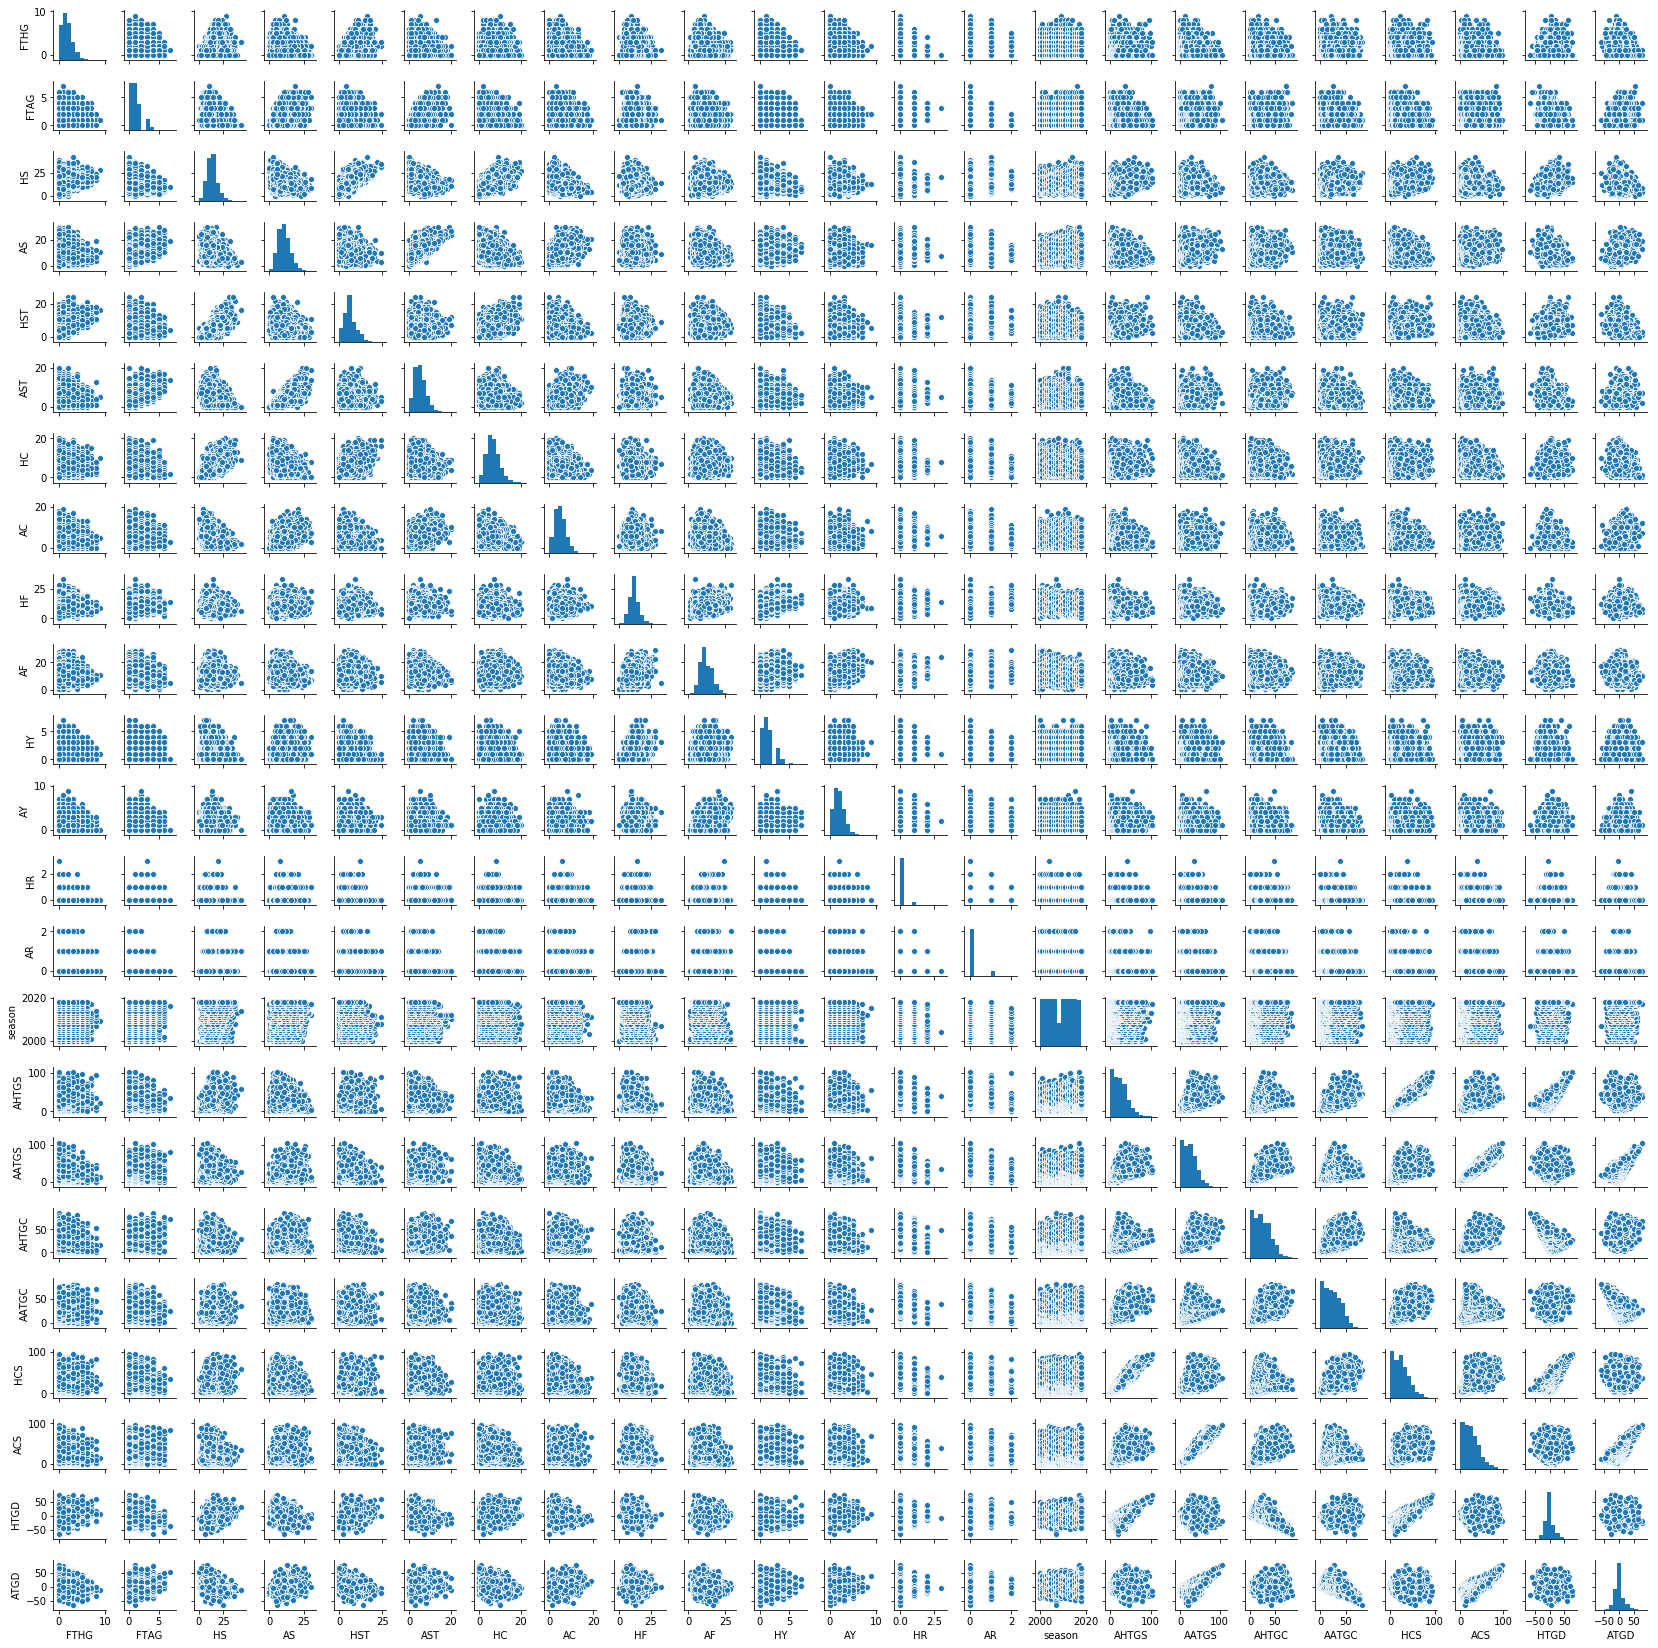

In [0]:
sns.pairplot(test.toPandas(),size=1)
plt.show()

# ML

## Prepare data

In [0]:
finalData = spark.read.csv('final_final_final_data.csv',header=True,inferSchema=True)

In [0]:
finalData.toPandas()

,_c0,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,season,AHTGS,AATGS,AHTGC,AATGC,HCS,ACS
0,0,0,2000-08-19,Charlton,Man City,4.0,0.0,H,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,2000.0,0,0,0,0,0,0
1,1,1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,2000.0,0,0,0,0,0,0
2,2,2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,2000.0,0,0,0,0,0,0
3,3,3,2000-08-19,Derby,Southampton,2.0,2.0,D,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,2000.0,0,0,0,0,0,0
4,4,4,2000-08-19,Leeds,Everton,2.0,0.0,H,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,2000.0,0,0,0,0,0,0
5,5,5,2000-08-19,Leicester,Aston Villa,0.0,0.0,D,5.0,5.0,4.0,3.0,5.0,4.0,12.0,12.0,2.0,3.0,0.0,0.0,2000.0,0,0,0,0,0,0
6,6,6,2000-08-19,Liverpool,Bradford,1.0,0.0,H,16.0,3.0,10.0,2.0,6.0,1.0,8.0,8.0,1.0,1.0,0.0,0.0,2000.0,0,0,0,0,0,0
7,7,7,2000-08-19,Sunderland,Arsenal,1.0,0.0,H,8.0,14.0,2.0,7.0,2.0,9.0,10.0,21.0,3.0,1.0,0.0,1.0,2000.0,0,0,0,0,0,0
8,8,8,2000-08-19,Tottenham,Ipswich,3.0,1.0,H,20.0,15.0,6.0,5.0,3.0,4.0,14.0,13.0,0.0,0.0,0.0,0.0,2000.0,0,0,0,0,0,0
9,9,9,2000-08-20,Man United,Newcastle,2.0,0.0,H,19.0,9.0,9.0,6.0,7.0,1.0,7.0,13.0,0.0,1.0,0.0,0.0,2000.0,0,0,0,0,0,0


In [0]:
df = finalData.drop('_c0').drop('Unnamed: 0')

In [0]:
df = df.withColumn('HTGD', col('AHTGS')-col('AHTGC')).withColumn('ATGD', col('AATGS')-col('AATGC'))

In [0]:
df.show()

+-------------------+-------------+-------------+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+-----+-----+-----+---+---+----+----+
|               Date|     HomeTeam|     AwayTeam|FTHG|FTAG|FTR| HS| AS|HST|AST| HC| AC| HF| AF| HY| AY| HR| AR|season|AHTGS|AATGS|AHTGC|AATGC|HCS|ACS|HTGD|ATGD|
+-------------------+-------------+-------------+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+-----+-----+-----+---+---+----+----+
|2000-08-19 00:00:00|     Charlton|     Man City|   4|   0|  H| 17|  8| 14|  4|  6|  6| 13| 12|  1|  2|  0|  0|  2000|    0|    0|    0|    0|  0|  0|   0|   0|
|2000-08-19 00:00:00|      Chelsea|     West Ham|   4|   2|  H| 17| 12| 10|  5|  7|  7| 19| 14|  1|  2|  0|  0|  2000|    0|    0|    0|    0|  0|  0|   0|   0|
|2000-08-19 00:00:00|     Coventry|Middlesbrough|   1|   3|  A|  6| 16|  3|  9|  8|  4| 15| 21|  5|  3|  1|  0|  2000|    0|    0|    0|    0|  0|  0|   0|   0|
|2000-08-19 00:00:00|        Derby

In [0]:
print(df.toPandas().isnull().sum())

Date         0
HomeTeam     0
AwayTeam     0
FTHG        20
FTAG        20
FTR         20
HS          20
AS          20
HST         20
AST         20
HC          20
AC          20
HF          20
AF          20
HY          20
AY          20
HR          20
AR          20
season      20
AHTGS        0
AATGS        0
AHTGC        0
AATGC        0
HCS          0
ACS          0
HTGD         0
ATGD         0
dtype: int64


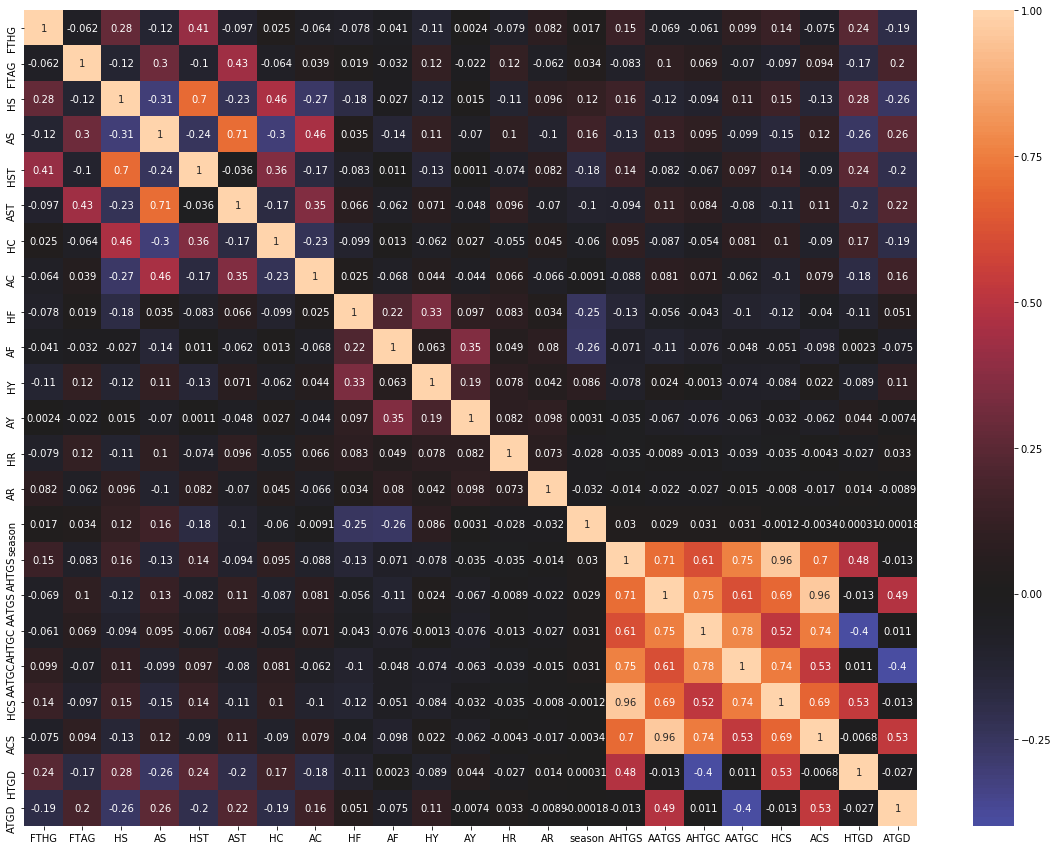

In [0]:
corr = df.toPandas().corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, ax=ax ,annot=True ,center=0)
plt.show()

In [21]:
features_labels = df.select('FTR','AHTGS','AATGS','AHTGC','AATGC','HTGD','ATGD','HCS','ACS').filter(col('FTR') != 'None')
print(features_labels.count())

7200


In [22]:
target_labels = df.select('AHTGS','AATGS','AHTGC','AATGC','HTGD','ATGD','HCS','ACS').filter(col('Date')>='2019-05-04')
#target_labels.toPandas()
print(target_labels.count())

20


## Modeling

In [0]:
features = ['AHTGS','AATGS','AHTGC','AATGC','HTGD','ATGD','HCS','ACS']

In [0]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = features,outputCol = 'features',handleInvalid='skip')

features_labels = assembler.transform(features_labels)
target_labels = assembler.transform(target_labels)

In [0]:
features_labels = features_labels.filter(col('AHTGS')!=0).filter(col('AATGS')!=0).filter(col('AHTGC')!=0)\
                                 .filter(col('AATGC')!=0).filter(col('HTGD')!=0).filter(col('ATGD')!=0)\
                                 .filter(col('HCS')!=0).filter(col('ACS')!=0)

In [26]:
features_labels.show()
target_labels.show()

print('Number Of features_lebels :'+ str(features_labels.count()))
#print('Number Of target_lebels :'+ str(target_lebels.count()))

+---+-----+-----+-----+-----+----+----+---+---+--------------------+
|FTR|AHTGS|AATGS|AHTGC|AATGC|HTGD|ATGD|HCS|ACS|            features|
+---+-----+-----+-----+-----+----+----+---+---+--------------------+
|  D|    3|    3|    1|    1|   2|   2|  3|  3|[3.0,3.0,1.0,1.0,...|
|  D|    3|    4|    2|    5|   1|  -1|  3|  1|[3.0,4.0,2.0,5.0,...|
|  H|    2|    3|    4|    4|  -2|  -1|  1|  3|[2.0,3.0,4.0,4.0,...|
|  A|    4|    3|    6|    4|  -2|  -1|  3|  3|[4.0,3.0,6.0,4.0,...|
|  A|    4|    4|    2|    1|   2|   3|  4|  3|[4.0,4.0,2.0,1.0,...|
|  H|    3|    4|    4|    2|  -1|   2|  3|  4|[3.0,4.0,4.0,2.0,...|
|  D|    3|    1|    4|    2|  -1|  -1|  1|  3|[3.0,1.0,4.0,2.0,...|
|  A|    4|    4|    1|    6|   3|  -2|  6|  3|[4.0,4.0,1.0,6.0,...|
|  H|    5|    2|    3|    1|   2|   1|  5|  4|[5.0,2.0,3.0,1.0,...|
|  D|    3|    4|    5|    7|  -2|  -3|  3|  1|[3.0,4.0,5.0,7.0,...|
|  D|    7|    6|    8|    7|  -1|  -1|  3|  2|[7.0,6.0,8.0,7.0,...|
|  D|    6|    5|    7|    4|  -1|

In [27]:
# Scale Data

from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

## Features_Labels ##
scalerModel = scaler.fit(features_labels)
scaledData = scalerModel.transform(features_labels)
scaledData.show()

## Target_Labels ##
scalerModel_target = scaler.fit(target_labels)
scaledData_target = scalerModel.transform(target_labels)
scaledData_target.show()

+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|FTR|AHTGS|AATGS|AHTGC|AATGC|HTGD|ATGD|HCS|ACS|            features|      scaledFeatures|
+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|  D|    3|    3|    1|    1|   2|   2|  3|  3|[3.0,3.0,1.0,1.0,...|[0.18157723984933...|
|  D|    3|    4|    2|    5|   1|  -1|  3|  1|[3.0,4.0,2.0,5.0,...|[0.18157723984933...|
|  H|    2|    3|    4|    4|  -2|  -1|  1|  3|[2.0,3.0,4.0,4.0,...|[0.12105149323289...|
|  A|    4|    3|    6|    4|  -2|  -1|  3|  3|[4.0,3.0,6.0,4.0,...|[0.24210298646578...|
|  A|    4|    4|    2|    1|   2|   3|  4|  3|[4.0,4.0,2.0,1.0,...|[0.24210298646578...|
|  H|    3|    4|    4|    2|  -1|   2|  3|  4|[3.0,4.0,4.0,2.0,...|[0.18157723984933...|
|  D|    3|    1|    4|    2|  -1|  -1|  1|  3|[3.0,1.0,4.0,2.0,...|[0.18157723984933...|
|  A|    4|    4|    1|    6|   3|  -2|  6|  3|[4.0,4.0,1.0,6.0,...|[0.24210298646578...|
|  H|    5

In [28]:
# Train Test Split

#Use season 2000/2001 - 2015/2016 as training data, 2016/2017 as testing data
#X_train = scaledData.filter(col('season') < 2016)
#X_test = scaledData.filter(col('season') == 2016)

#Split 70:30 by season
X_train = scaledData.filter(col('season') <= 2013)
X_test = scaledData.filter(col('season') > 2013)
X_predict = scaledData_target

#(X_train,X_test) = scaledData.randomSplit([0.7,0.3],20)
print('Number Of X_train: '+str(X_train.count()), '\t Number Of X_test: '+str(X_test.count()), '\t Number Of X_predict: '+str(X_predict.count()))

Number Of X_train: 4563 	 Number Of X_test: 1609 	 Number Of X_predict: 20


In [29]:
X_train.show()

+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|FTR|AHTGS|AATGS|AHTGC|AATGC|HTGD|ATGD|HCS|ACS|            features|      scaledFeatures|
+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|  D|    3|    3|    1|    1|   2|   2|  3|  3|[3.0,3.0,1.0,1.0,...|[0.18157723984933...|
|  D|    3|    4|    2|    5|   1|  -1|  3|  1|[3.0,4.0,2.0,5.0,...|[0.18157723984933...|
|  H|    2|    3|    4|    4|  -2|  -1|  1|  3|[2.0,3.0,4.0,4.0,...|[0.12105149323289...|
|  A|    4|    3|    6|    4|  -2|  -1|  3|  3|[4.0,3.0,6.0,4.0,...|[0.24210298646578...|
|  A|    4|    4|    2|    1|   2|   3|  4|  3|[4.0,4.0,2.0,1.0,...|[0.24210298646578...|
|  H|    3|    4|    4|    2|  -1|   2|  3|  4|[3.0,4.0,4.0,2.0,...|[0.18157723984933...|
|  D|    3|    1|    4|    2|  -1|  -1|  1|  3|[3.0,1.0,4.0,2.0,...|[0.18157723984933...|
|  A|    4|    4|    1|    6|   3|  -2|  6|  3|[4.0,4.0,1.0,6.0,...|[0.24210298646578...|
|  H|    5

In [30]:
X_test.show()

+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|FTR|AHTGS|AATGS|AHTGC|AATGC|HTGD|ATGD|HCS|ACS|            features|      scaledFeatures|
+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|  A|    5|    1|    1|    2|   4|  -1|  6|  1|[5.0,1.0,1.0,2.0,...|[0.30262873308222...|
|  A|    3|    1|    2|    2|   1|  -1|  3|  1|[3.0,1.0,2.0,2.0,...|[0.18157723984933...|
|  D|    2|    4|    4|    3|  -2|   1|  1|  4|[2.0,4.0,4.0,3.0,...|[0.12105149323289...|
|  D|    5|    5|    4|    2|   1|   3|  5|  6|[5.0,5.0,4.0,2.0,...|[0.30262873308222...|
|  H|   11|    6|    4|    1|   7|   5|  9|  9|[11.0,6.0,4.0,1.0...|[0.66578321278090...|
|  D|    5|    1|    8|    4|  -3|  -3|  1|  1|[5.0,1.0,8.0,4.0,...|[0.30262873308222...|
|  A|    6|    3|    4|    1|   2|   2|  6|  7|[6.0,3.0,4.0,1.0,...|[0.36315447969867...|
|  H|    4|    3|    3|    5|   1|  -2|  4|  2|[4.0,3.0,3.0,5.0,...|[0.24210298646578...|
|  D|    3

In [31]:
X_predict.show()

+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|AHTGS|AATGS|AHTGC|AATGC|HTGD|ATGD|HCS|ACS|            features|      scaledFeatures|
+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+
|   50|   44|   44|   63|   6| -19| 50| 40|[50.0,44.0,44.0,6...|[3.02628733082229...|
|   52|   65|   65|   36| -13|  29| 42| 70|[52.0,65.0,65.0,3...|[3.14733882405518...|
|   45|   44|   54|   61|  -9| -17| 46| 38|[45.0,44.0,54.0,6...|[2.72365859774006...|
|   46|   34|   44|   76|   2| -42| 54| 26|[46.0,34.0,44.0,7...|[2.78418434435650...|
|   30|   43|   66|   48| -36|  -5| 31| 43|[30.0,43.0,66.0,4...|[1.81577239849337...|
|   36|   84|   45|   20|  -9|  64| 42| 91|[36.0,84.0,45.0,2...|[2.17892687819205...|
|   60|   51|   39|   52|  21|  -1| 68| 50|[60.0,51.0,39.0,5...|[3.63154479698675...|
|   20|   64|   74|   51| -54|  13| 14| 65|[20.0,64.0,74.0,5...|[1.21051493232891...|
|   69|   33|   49|   55|  20| -22| 66| 35|[69.0,33.0,

In [32]:
# H(HomeTeam Win) -> 0 , A(AwayTeam Win) -> 1 , D(Draw) -> 2
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="FTR", outputCol="FTR_catIndex",handleInvalid='skip')

Train_VecData_indexed = indexer.fit(X_train).transform(X_train)
Test_VecData_indexed = indexer.fit(X_test).transform(X_test)

Train_VecData_indexed.show(10)
Test_VecData_indexed.show(10)


+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+------------+
|FTR|AHTGS|AATGS|AHTGC|AATGC|HTGD|ATGD|HCS|ACS|            features|      scaledFeatures|FTR_catIndex|
+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+------------+
|  D|    3|    3|    1|    1|   2|   2|  3|  3|[3.0,3.0,1.0,1.0,...|[0.18157723984933...|         2.0|
|  D|    3|    4|    2|    5|   1|  -1|  3|  1|[3.0,4.0,2.0,5.0,...|[0.18157723984933...|         2.0|
|  H|    2|    3|    4|    4|  -2|  -1|  1|  3|[2.0,3.0,4.0,4.0,...|[0.12105149323289...|         0.0|
|  A|    4|    3|    6|    4|  -2|  -1|  3|  3|[4.0,3.0,6.0,4.0,...|[0.24210298646578...|         1.0|
|  A|    4|    4|    2|    1|   2|   3|  4|  3|[4.0,4.0,2.0,1.0,...|[0.24210298646578...|         1.0|
|  H|    3|    4|    4|    2|  -1|   2|  3|  4|[3.0,4.0,4.0,2.0,...|[0.18157723984933...|         0.0|
|  D|    3|    1|    4|    2|  -1|  -1|  1|  3|[3.0,1.0,4.0,2.0,...|[0.18

In [33]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'scaledFeatures', labelCol = 'FTR_catIndex',numTrees=200,maxDepth=7,maxBins=10)

rfModel = rf.fit(Train_VecData_indexed)

predictions = rfModel.transform(Test_VecData_indexed)
target_result = rfModel.transform(X_predict)

predictions.show(30)
target_result.show(30)

+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+------------+--------------------+--------------------+----------+
|FTR|AHTGS|AATGS|AHTGC|AATGC|HTGD|ATGD|HCS|ACS|            features|      scaledFeatures|FTR_catIndex|       rawPrediction|         probability|prediction|
+---+-----+-----+-----+-----+----+----+---+---+--------------------+--------------------+------------+--------------------+--------------------+----------+
|  A|    5|    1|    1|    2|   4|  -1|  6|  1|[5.0,1.0,1.0,2.0,...|[0.30262873308222...|         1.0|[114.984678095270...|[0.57492339047635...|       0.0|
|  A|    3|    1|    2|    2|   1|  -1|  3|  1|[3.0,1.0,2.0,2.0,...|[0.18157723984933...|         1.0|[97.9114518873029...|[0.48955725943651...|       0.0|
|  D|    2|    4|    4|    3|  -2|   1|  1|  4|[2.0,4.0,4.0,3.0,...|[0.12105149323289...|         2.0|[80.1673130442013...|[0.40083656522100...|       0.0|
|  D|    5|    5|    4|    2|   1|   3|  5|  6|[5.0,5.0,4.0,2.0,

In [34]:
# Summary Model Training
predictions.select('prediction').distinct().show()

print('Number Of HomeTeam Win Prediction : ' + str(predictions.select('prediction').filter(col('prediction')==0).count()))
print('Number Of AwayTeam Win Prediction : ' + str(predictions.select('prediction').filter(col('prediction')==1).count()))
print('Number Of Draw Prediction : ' + str(predictions.select('prediction').filter(col('prediction')==2).count()))

+----------+
|prediction|
+----------+
|       0.0|
|       1.0|
|       2.0|
+----------+

Number Of HomeTeam Win Prediction : 1199
Number Of AwayTeam Win Prediction : 394
Number Of Draw Prediction : 16


In [35]:
# Summary Model Prediction
target_result.select('prediction').distinct().show()

print('Number Of HomeTeam Win Prediction Result : ' + str(target_result.select('prediction').filter(col('prediction')==0).count()))
print('Number Of AwayTeam Win Prediction Result : ' + str(target_result.select('prediction').filter(col('prediction')==1).count()))
print('Number Of Draw Prediction Result : ' + str(target_result.select('prediction').filter(col('prediction')==2).count()))

+----------+
|prediction|
+----------+
|       0.0|
|       1.0|
+----------+

Number Of HomeTeam Win Prediction Result : 14
Number Of AwayTeam Win Prediction Result : 6
Number Of Draw Prediction Result : 0


In [0]:
result = df.select('HomeTeam','AwayTeam').filter(col('Date')>='2019-05-04')

In [0]:
target = target_result.select('prediction')

In [38]:
from pyspark.sql.functions import monotonically_increasing_id 

result = result.withColumn("id",monotonically_increasing_id())
target = target.withColumn("id",monotonically_increasing_id())

result.show()
target.show()

+--------------+--------------+---+
|      HomeTeam|      AwayTeam| id|
+--------------+--------------+---+
|       Everton|       Burnley|  0|
|   Bournemouth|     Tottenham|  1|
|      West Ham|   Southampton|  2|
|        Wolves|        Fulham|  3|
|       Cardiff|Crystal Palace|  4|
|     Newcastle|     Liverpool|  5|
|       Chelsea|       Watford|  6|
|  Huddersfield|    Man United|  7|
|       Arsenal|      Brighton|  8|
|      Man City|     Leicester|  9|
|     Liverpool|        Wolves| 10|
|Crystal Palace|   Bournemouth| 11|
|     Tottenham|       Everton| 12|
|       Watford|      West Ham| 13|
|        Fulham|     Newcastle| 14|
|      Brighton|      Man City| 15|
|     Leicester|       Chelsea| 16|
|   Southampton|  Huddersfield| 17|
|    Man United|       Cardiff| 18|
|       Burnley|       Arsenal| 19|
+--------------+--------------+---+

+----------+---+
|prediction| id|
+----------+---+
|       0.0|  0|
|       1.0|  1|
|       0.0|  2|
|       0.0|  3|
|       0.0|  4|

In [39]:
result = result.join(target,['id'],how='right').sort(col('id').asc()).drop('id')
result.show()

+--------------+--------------+----------+
|      HomeTeam|      AwayTeam|prediction|
+--------------+--------------+----------+
|       Everton|       Burnley|       0.0|
|   Bournemouth|     Tottenham|       1.0|
|      West Ham|   Southampton|       0.0|
|        Wolves|        Fulham|       0.0|
|       Cardiff|Crystal Palace|       0.0|
|     Newcastle|     Liverpool|       1.0|
|       Chelsea|       Watford|       0.0|
|  Huddersfield|    Man United|       1.0|
|       Arsenal|      Brighton|       0.0|
|      Man City|     Leicester|       0.0|
|     Liverpool|        Wolves|       0.0|
|Crystal Palace|   Bournemouth|       0.0|
|     Tottenham|       Everton|       0.0|
|       Watford|      West Ham|       0.0|
|        Fulham|     Newcastle|       0.0|
|      Brighton|      Man City|       1.0|
|     Leicester|       Chelsea|       1.0|
|   Southampton|  Huddersfield|       0.0|
|    Man United|       Cardiff|       0.0|
|       Burnley|       Arsenal|       1.0|
+----------

In [0]:
from pyspark.sql.functions import when

targetDf = result.withColumn("prediction", \
              when(target["prediction"] == 0, 'H').otherwise('A'))

In [41]:
targetDf.show()

+--------------+--------------+----------+
|      HomeTeam|      AwayTeam|prediction|
+--------------+--------------+----------+
|       Everton|       Burnley|         H|
|   Bournemouth|     Tottenham|         A|
|      West Ham|   Southampton|         H|
|        Wolves|        Fulham|         H|
|       Cardiff|Crystal Palace|         H|
|     Newcastle|     Liverpool|         A|
|       Chelsea|       Watford|         H|
|  Huddersfield|    Man United|         A|
|       Arsenal|      Brighton|         H|
|      Man City|     Leicester|         H|
|     Liverpool|        Wolves|         H|
|Crystal Palace|   Bournemouth|         H|
|     Tottenham|       Everton|         H|
|       Watford|      West Ham|         H|
|        Fulham|     Newcastle|         H|
|      Brighton|      Man City|         A|
|     Leicester|       Chelsea|         A|
|   Southampton|  Huddersfield|         H|
|    Man United|       Cardiff|         H|
|       Burnley|       Arsenal|         A|
+----------

In [46]:
from pyspark.ml.evaluation import *
from pyspark.mllib.evaluation import MulticlassMetrics

evaluator = MulticlassClassificationEvaluator(labelCol='FTR_catIndex',predictionCol='prediction')
accuracy = evaluator.evaluate(predictions)

predictionAndLabels = predictions.rdd.map(lambda lp: (float(lp.prediction), lp.FTR_catIndex))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Overall statistics
precision = metrics.precision()
recall = metrics.recall()
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Accuracy = %s" % accuracy)
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Accuracy = 0.45276583914307955
Precision = 0.5307644499689248
Recall = 0.5307644499689248
F1 Score = 0.5307644499689248


In [0]:
#logistic regression
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol = 'FTR_catIndex', featuresCol= 'scaledFeatures', family = 'multinomial')

# Fit the model
lrModel = lr.fit(Train_VecData_indexed)
predict_train=lrModel.transform(Train_VecData_indexed)
predict_test=lrModel.transform(Test_VecData_indexed).show(30)

# Split Train and Test

## One hot encoding algorithm test

In [0]:
#OneHotEncode the categorical column
from pyspark.ml.feature import CountVectorizer
def getOneHotEncoded (X,c):
  
  #Create new column of array of categorical column
  X = X.withColumn(c+"_array", split(col(c)," "))
  
  # Initialize a CountVectorizer.
  categoryVectorizer = CountVectorizer(inputCol=c+"_array", outputCol=c+"_OneHotEncoded", vocabSize=3, minDF=1.0)

  #Get a VectorizerModel
  categoryVectorizer_model = categoryVectorizer.fit(X)

  #Transform to DataFrame
  X_ohe = categoryVectorizer_model.transform(X)
  X_ohe = X_ohe.drop(col(c+"_array"))
  X_ohe = X_ohe.drop(col(c))
  return X_ohe

  '''
  x_3d = np.array(X_ohe.select(column+'_OneHotEncoded').collect())
  print(x_3d)
  rows, idx, vocabSize = x_3d.shape
  print(rows)
  Y = x_3d.reshape(rows, vocabSize)
  print(Y)

  Y = pd.DataFrame(data=X[0:,0:])
  Y = spark.createDataFrame(Y)
  Y.show()
  '''

  

In [0]:
#Agorithm test
#we want continous vars that are integers for our input data, so lets remove any categorical vars
#Import Spark CountVectorizer
def preprocess_features(X):
  ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''

  names = X.schema.names

  for name in names:
    if(X.schema[name].dataType == StringType()):#check DataType of each column
      X = getOneHotEncoded(X, name)

  #print(category)
  # Initialize new output DataFrame

  # Investigate each feature column for the data
  #for col, col_data in X.iteritems():

      # If data type is categorical, convert to dummy variables
      #if col_data.dtype == object:
          #col_data = pd.get_dummies(col_data, prefix = col)

      # Collect the revised columns
      #output = output.join(col_data)

  return X
    
features_ohe = preprocess_features(features_labels)
features_ohe.show()
#x_all.tail()

+----+----+----+----+----+----+----+----+----+----+---+---+---+---+-----------------+
|HTGD|ATGD|  HS|  AS| HST| AST|  HC|  AC|  HF|  AF| HY| AY| HR| AR|FTR_OneHotEncoded|
+----+----+----+----+----+----+----+----+----+----+---+---+---+---+-----------------+
| 0.0| 0.0|17.0| 8.0|14.0| 4.0| 6.0| 6.0|13.0|12.0|1.0|2.0|0.0|0.0|    (3,[0],[1.0])|
| 0.0| 0.0|17.0|12.0|10.0| 5.0| 7.0| 7.0|19.0|14.0|1.0|2.0|0.0|0.0|    (3,[0],[1.0])|
| 0.0| 0.0| 5.0| 5.0| 4.0| 3.0| 5.0| 4.0|12.0|12.0|2.0|3.0|0.0|0.0|    (3,[2],[1.0])|
| 0.0| 0.0| 8.0|14.0| 2.0| 7.0| 2.0| 9.0|10.0|21.0|3.0|1.0|0.0|1.0|    (3,[0],[1.0])|
| 0.0| 0.0| 6.0|13.0| 4.0| 6.0| 5.0| 8.0|11.0|13.0|1.0|1.0|0.0|0.0|    (3,[2],[1.0])|
| 0.0| 0.0|16.0| 3.0|10.0| 2.0| 6.0| 1.0| 8.0| 8.0|1.0|1.0|0.0|0.0|    (3,[0],[1.0])|
| 0.0| 0.0|20.0|15.0| 6.0| 5.0| 3.0| 4.0|14.0|13.0|0.0|0.0|0.0|0.0|    (3,[0],[1.0])|
| 0.0| 0.0| 6.0|16.0| 3.0| 9.0| 8.0| 4.0|15.0|21.0|5.0|3.0|1.0|0.0|    (3,[1],[1.0])|
| 0.0| 0.0|17.0|12.0| 8.0| 6.0| 6.0| 4.0|21.0|20.0|1.0

In [0]:
#split train and test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Use season 2000/2001 - 2015/2016 as training data, 2016/2017 as testing data
X_train = features_labels.filter(col('season') < 2016)
X_test = features_labels.filter(col('season') == 2016)

#scale train data
columnName = "HTGD"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "ATGD"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))
'''
columnName = "HS"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "AS"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "HST"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "AST"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "HC"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "AC"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "HF"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "AF"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "HY"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "AY"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "HR"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))

columnName = "AR"
X_train = X_train.select(mean(columnName).alias("mean_"+columnName), stddev(columnName)\
               .alias("stddev_"+columnName)).crossJoin(X_train)\
.withColumn(columnName+"_scaled" , (col(columnName) - col("mean_"+columnName)) / col("stddev_"+columnName)).drop(col("mean_"+columnName)).drop(col("stddev_"+columnName)).drop(col(columnName))
'''
X_train.show()

#scale test data
X_test = X_test.select(mean("HTGD").alias("mean_HTGD"), stddev("HTGD")\
               .alias("stddev_HTGD")).crossJoin(X_test)\
.withColumn("HTGD_scaled" , (col("HTGD") - col("mean_HTGD")) / col("stddev_HTGD")).drop(col('mean_HTGD')).drop(col('stddev_HTGD')).drop(col('HTGD'))

X_test = X_test.select(mean("ATGD").alias("mean_ATGD"), stddev("ATGD")\
               .alias("stddev_ATGD")).crossJoin(X_test)\
.withColumn("ATGD_scaled" , (col("ATGD") - col("mean_ATGD")) / col("stddev_ATGD")).drop(col('mean_ATGD')).drop(col('stddev_ATGD')).drop(col('ATGD'))

X_test.show()

# Feature Vector

In [0]:
#Select columns as features
features = [
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'HTGD_scaled',
 'HTGD_scaled']

In [0]:
#Create features vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = features,outputCol = 'features')
Train_VecData = assembler.transform(X_train)
Train_VecData.show()

+---+----+----+----+----+----+----+----+----+---+---+---+---+--------------------+--------------------+--------------------+
|FTR|  HS|  AS| HST| AST|  HC|  AC|  HF|  AF| HY| AY| HR| AR|         HTGD_scaled|         ATGD_scaled|            features|
+---+----+----+----+----+----+----+----+----+---+---+---+---+--------------------+--------------------+--------------------+
|  H|17.0| 8.0|14.0| 4.0| 6.0| 6.0|13.0|12.0|1.0|2.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[17.0,8.0,14.0,4....|
|  H|17.0|12.0|10.0| 5.0| 7.0| 7.0|19.0|14.0|1.0|2.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[17.0,12.0,10.0,5...|
|  D| 5.0| 5.0| 4.0| 3.0| 5.0| 4.0|12.0|12.0|2.0|3.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[5.0,5.0,4.0,3.0,...|
|  H| 8.0|14.0| 2.0| 7.0| 2.0| 9.0|10.0|21.0|3.0|1.0|0.0|1.0|0.006111641622747846|-0.01181282855619...|[8.0,14.0,2.0,7.0...|
|  D| 6.0|13.0| 4.0| 6.0| 5.0| 8.0|11.0|13.0|1.0|1.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[6.0,13.0,4.0,6.0...|


In [0]:
from pyspark.ml.feature import StringIndexer

#Index the label
indexer = StringIndexer(inputCol="FTR", outputCol="FTR_categoryIndex")
Train_VecData_indexed = indexer.fit(Train_VecData).transform(Train_VecData)
Train_VecData_indexed.show()

+---+----+----+----+----+----+----+----+----+---+---+---+---+--------------------+--------------------+--------------------+-----------------+
|FTR|  HS|  AS| HST| AST|  HC|  AC|  HF|  AF| HY| AY| HR| AR|         HTGD_scaled|         ATGD_scaled|            features|FTR_categoryIndex|
+---+----+----+----+----+----+----+----+----+---+---+---+---+--------------------+--------------------+--------------------+-----------------+
|  H|17.0| 8.0|14.0| 4.0| 6.0| 6.0|13.0|12.0|1.0|2.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[17.0,8.0,14.0,4....|              0.0|
|  H|17.0|12.0|10.0| 5.0| 7.0| 7.0|19.0|14.0|1.0|2.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[17.0,12.0,10.0,5...|              0.0|
|  D| 5.0| 5.0| 4.0| 3.0| 5.0| 4.0|12.0|12.0|2.0|3.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[5.0,5.0,4.0,3.0,...|              2.0|
|  H| 8.0|14.0| 2.0| 7.0| 2.0| 9.0|10.0|21.0|3.0|1.0|0.0|1.0|0.006111641622747846|-0.01181282855619...|[8.0,14.0,2.0,7.0...|              0.0|

In [0]:
#logistic regression
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol = 'FTR_categoryIndex', family = 'multinomial')

# Fit the model
lrModel = lr.fit(Train_VecData_indexed)
predict_train=lrModel.transform(Train_VecData_indexed)
predict_test=lrModel.transform(Train_VecData_indexed).show(100)

+---+----+----+----+----+----+----+----+----+---+---+---+---+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+----------+
|FTR|  HS|  AS| HST| AST|  HC|  AC|  HF|  AF| HY| AY| HR| AR|         HTGD_scaled|         ATGD_scaled|            features|FTR_categoryIndex|       rawPrediction|         probability|prediction|
+---+----+----+----+----+----+----+----+----+---+---+---+---+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+----------+
|  H|17.0| 8.0|14.0| 4.0| 6.0| 6.0|13.0|12.0|1.0|2.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[17.0,8.0,14.0,4....|              0.0|[0.36418883884874...|[0.46315854031020...|       0.0|
|  H|17.0|12.0|10.0| 5.0| 7.0| 7.0|19.0|14.0|1.0|2.0|0.0|0.0|0.006111641622747846|-0.01181282855619...|[17.0,12.0,10.0,5...|              0.0|[0.36418883884874...|[0.46315854031020...|       0.0|
|  D| 5.0| 5.0| 4.0|